In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
from pathlib import Path
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
import re
from pathlib import Path
import os
import pickle
import numpy as np

# Initialize the dictionary to hold file transcriptions
transcriptionsdict = dict()
# Define the regex pattern to capture the audio code
audio_code_regex = re.compile(r'^(\S+)\s')
# Define the regex pattern to capture the transcription part
transcription_regex = re.compile(r':\s*(.*)$')

# Loop through each session
for numsess in range(1, 6):
    dir_transcripts = "/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/Session"+str(numsess)+"/dialog/transcriptions/"

    txt_transcripts = os.listdir(dir_transcripts)
    # Loop through each file in the directory
    for file in txt_transcripts:
        # Ensure we are reading a file
        # Open and read the file
        b = dir_transcripts + file
        with open(b,'r') as f:
            text = f.readlines()

        # Process each line in the file
        for line in text:
            audio_match = re.search(audio_code_regex, line)
            match_transcription = re.search(transcription_regex, line)
            if audio_match and match_transcription:
                audio_key = audio_match.groups()[0]
                transcription_value = match_transcription.groups()[0].strip()
                # Add the audio code and transcription to the dictionary
                #assuming keys unique
                transcriptionsdict.update({audio_key: transcription_value})

In [4]:
def insert_space_before_punctuation(s):
    result = []
    for char in s:
        if char in '.!?':
            result.append(' ')
        result.append(char)
    return ''.join(result)

In [5]:
# Stop words
import nltk
nltk.download('stopwords')
#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import scipy
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
!python3 -m textblob.download_corpora

def tweet_normalization(text):
    # convert text to lowercase
    text = text.lower()
    text = insert_space_before_punctuation(text)
    # remove non alphanumeric character
    text = re.sub(r'[^A-Za-z0-9.!?]+', ' ', text)
    #lematization techniques
    lemmatizer = WordNetLemmatizer()
    # stop words definition
    stop_words = nltk.corpus.stopwords.words('english')
    # combine all previous methods in order to clear the text
    result = ' '.join(
        lemmatizer.lemmatize(term)#term
        for term in text.split()
        if term not in set(stop_words)
    )
    #filtered_words = ' '.join(word for word in text.split() if word not in set(stop_words))
    #result = filtered_words
    #result=text

    return result

def preprocess(input_df):
    # Remove rows with missing values in column col
    input_df.dropna(inplace=True)
    # Speed up code using numpy vectorization
    vfunc = np.vectorize(tweet_normalization)
    input_df['new_transcription'] = vfunc(input_df.transcription)
    # return processed input_df
    return input_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [6]:
df_audio = pd.read_csv('/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/IEMOCAP_full_release/preprocesseddata/oversampling_audio_features.csv')

# # Display the first few rows of the dataset
# df_audio['label'] = df_audio['label'].replace({3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 0: 0, 1: 1, 2: 1})
# # Remove rows with the specific label
# df_audio = df_audio[df_audio['label'] != 8]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df_audio[df_audio.columns[3:]] = scaling.fit_transform(df_audio[df_audio.columns[3:]])
df_audio.head()

# x_train_audio, x_test_audio = train_test_split(df_audio, test_size=0.20)
# print(x_train_audio.shape)
# (x_test_audio.shape)

,Unnamed: 0,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,1,Ses01M_script02_1_F001,6,0.019368,0.031179,0.019174,0.054272,0.528972,0.170981,0.001440,0.000142
1,2,Ses01M_script02_1_F002,4,0.024853,0.041019,0.026665,0.069161,0.780451,0.170426,0.002389,0.000208
2,5,Ses01M_script02_1_F005,0,0.099801,0.123783,0.103316,0.164328,0.402460,0.171265,0.017251,0.003625
3,7,Ses01M_script02_1_F007,5,0.027277,0.036102,0.028212,0.052363,0.539050,0.172003,0.001838,0.000098
4,8,Ses01M_script02_1_F008,5,0.008010,0.009314,0.008270,0.011717,0.000000,0.170435,0.000119,0.000011


In [8]:
df_iemo2 = pd.read_csv('/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/IEMOCAP_full_release/preprocesseddata/df_iemocap_oversampling.csv')
print(df_iemo2.shape)
# df_iemo2 = pd.read_csv('/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/IEMOCAP_full_release/preprocesseddata/df_iemocap.csv')
# print(df_iemo2.shape)

df_iemo2_train, df_iemo2_test = train_test_split(df_iemo2, test_size=0.20)
audio_train, audio_test = train_test_split(df_audio, test_size=0.20)

(7527, 4)


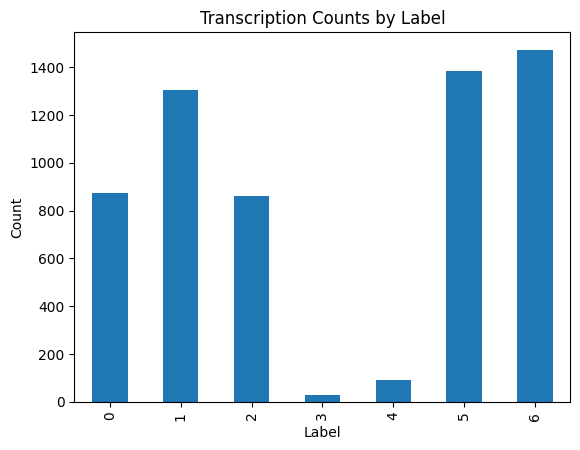

In [9]:
import matplotlib.pyplot as plt
# Group the data by the 'label' column
label_groups = df_iemo2_train.groupby('label')

# Count the number of transcriptions in each group
transcription_counts = label_groups['transcription'].count()

# Plot the counts as a bar chart with the y-axis starting at 0
ax = transcription_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Transcription Counts by Label')
plt.show()

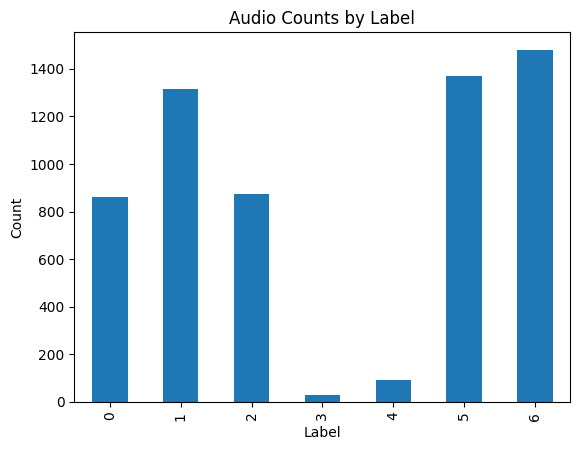

In [10]:
# Group the data by the 'label' column
label_groups = audio_train.groupby('label')

# Count the number of transcriptions in each group
audio_counts = label_groups['wav_file'].count()

# Plot the counts as a bar chart with the y-axis starting at 0
ax = audio_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Audio Counts by Label')
plt.show()

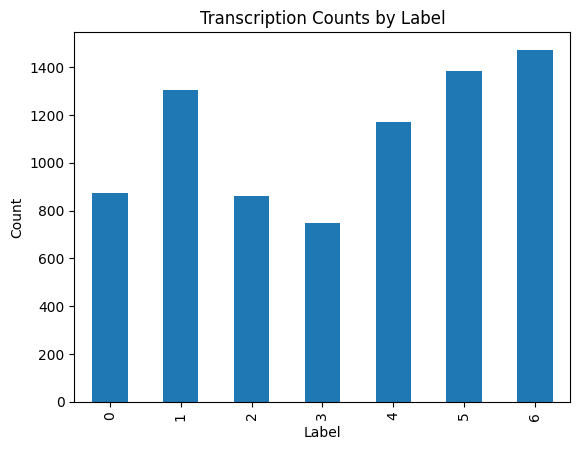

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Oversample the 'fear' and 'surprise' classes in the training set
fear_df = df_iemo2_train[df_iemo2_train['label'] == 3]
for i in range(24):
    df_iemo2_train = pd.concat([df_iemo2_train, fear_df], ignore_index=True)

sur_df = df_iemo2_train[df_iemo2_train['label'] == 4]
for i in range(12):
    df_iemo2_train = pd.concat([df_iemo2_train, sur_df], ignore_index=True)

# Separate the oversampled training data back into audios and labels
x_train = df_iemo2_train.drop(columns=['label'])
y_train = df_iemo2_train['label']

# Group the data by the 'label' column
label_groups = df_iemo2_train.groupby('label')

# Count the number of transcriptions in each group
transcription_counts = label_groups['transcription'].count()

# Plot the counts as a bar chart with the y-axis starting at 0
ax = transcription_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Transcription Counts by Label')
plt.show()

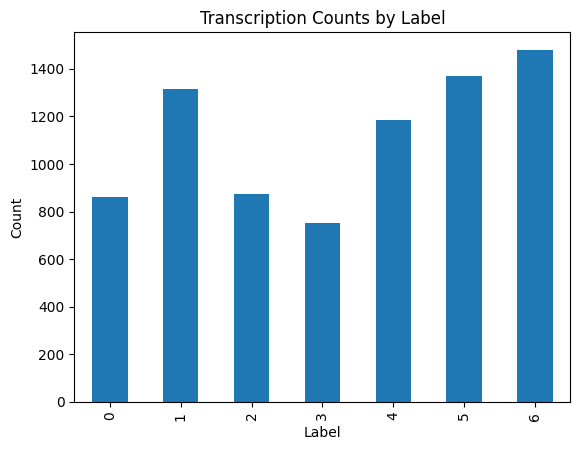

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Combine the training features and labels into a single DataFrame for oversampling
train_df = audio_train.copy()
train_df['label'] = audio_train['label']


# Oversample the 'fear' and 'surprise' classes in the training set
fear_df = train_df[train_df['label'] == 3]
for i in range(24):
    train_df = pd.concat([train_df, fear_df], ignore_index=True)

# Oversample the 'fear' and 'surprise' classes in the training set
# Since there's no label 3 (fear) in this sample, I'll just oversample label 4 (surprise)
sur_df = train_df[train_df['label'] == 4]
for i in range(12):
    train_df = pd.concat([train_df, sur_df], ignore_index=True)

audio_train = train_df.copy()

# Group the data by the 'label' column
label_groups = audio_train.groupby('label')

# Count the number of transcriptions in each group
transcription_counts = label_groups['wav_file'].count()

# Plot the counts as a bar chart with the y-axis starting at 0
ax = transcription_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Transcription Counts by Label')
plt.show()

In [13]:

# Prepare text data
#df_iemo_train, df_iemo_test = train_test_split(df_iemo2, test_size=0.20)
text_train_combined = pd.DataFrame()
pd.set_option('display.max_colwidth', None)
text_train_combined['wav_file_names'] = audio_train['wav_file']

text_train_combined['transcription'] = [transcriptionsdict[code] for code in audio_train['wav_file']]

text_train_combined2 = preprocess(text_train_combined)



# text_combined2['label'] = df_iemo2 ['emotions']
# text_combined2['label'] = text_combined2['label'].replace({3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 0: 0, 1: 1, 2: 1})
# text_combined2 = text_combined2[text_combined2['label'] != 8]
text_train_combined2[:10]
text_train_combined2.shape

(7833, 3)

In [14]:
text_test_combined = pd.DataFrame()
pd.set_option('display.max_colwidth', None)
text_test_combined['wav_file_names'] = audio_test['wav_file']

text_test_combined['transcription'] = [transcriptionsdict[code] for code in audio_test['wav_file']]

text_test_combined2 = preprocess(text_test_combined)


text_test_combined2[:10]
text_test_combined2.shape

text_test_combined2[:10]
text_test_combined2.shape

(1506, 3)

In [15]:
# use the cv in our sets to convert the words
#passing the train and test set and validation set from the csv
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfidf_vectors = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english') #latin-1

# Concatenate column 'A' from both DataFrames vertically
concatenated_column = pd.concat([text_train_combined2['new_transcription'], text_test_combined2['new_transcription']], ignore_index=True)
X_train = tfidf_vectors.fit_transform(concatenated_column)

x_train_text = X_train[:text_train_combined2.shape[0]]
x_test_text = X_train[text_train_combined2.shape[0]:]

print(X_train.shape, x_train_text.shape, x_test_text.shape)
print("edw",audio_train.shape)
print(x_train_text.toarray().shape)
print(x_train_text)

(9339, 2191) (7833, 2191) (1506, 2191)
edw (7833, 11)
(7833, 2191)
  (0, 2)	1.0
  (1, 1962)	1.0
  (2, 470)	0.5633376736531472
  (2, 1242)	0.5633376736531472
  (2, 469)	0.5429392500747476
  (2, 1203)	0.2655528226443677
  (3, 1870)	1.0
  (5, 1980)	0.7923010584224786
  (5, 921)	0.3193926500907983
  (5, 1979)	0.5198532176399382
  (6, 107)	1.0
  (7, 2039)	1.0
  (8, 56)	0.6644319121184362
  (8, 887)	0.4631606984345671
  (8, 773)	0.529764958845019
  (8, 921)	0.25171708317906794
  (9, 994)	0.7783966918032441
  (9, 1870)	0.6277727217630322
  (10, 2165)	0.6804028539194688
  (10, 1528)	0.3470123889294309
  (10, 1984)	0.44120073976758395
  (10, 2148)	0.31511693876661934
  (10, 1870)	0.35025359446923976
  (11, 1502)	0.40330888495171197
  (11, 44)	0.397417134523388
  :	:
  (7825, 523)	0.5488220450822606
  (7825, 501)	0.5722427610346335
  (7826, 2135)	0.5162152186502309
  (7826, 41)	0.5114684306593201
  (7826, 2134)	0.4184222679397713
  (7826, 40)	0.4593387930288185
  (7826, 1528)	0.2930060944481409


In [16]:
print(audio_train["label"][:10])

0    5
1    0
2    0
3    5
4    1
5    1
6    1
7    5
8    5
9    1
Name: label, dtype: int64


In [17]:
combined_x_train = np.concatenate((np.array(audio_train[audio_train.columns[3:]]), x_train_text.toarray()), axis=-1)
combined_x_test = np.concatenate((np.array(audio_test[audio_test.columns[3:]]), x_test_text.toarray()), axis=1)

attributes_dictionary = dict()

attributes_dictionary['x_train'] = combined_x_train
attributes_dictionary['x_test'] = combined_x_test
attributes_dictionary['y_train'] = np.array(audio_train["label"])
attributes_dictionary['y_test'] = np.array(audio_test["label"])

print(combined_x_train.shape, combined_x_test.shape)

(7833, 2199) (1506, 2199)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

random_forest = RandomForestClassifier(n_estimators=600, min_samples_split=25)#n_estimators=700,criterion= 'gini',max_depth= 30, max_features=10
random_forest.fit(attributes_dictionary['x_train'], attributes_dictionary['y_train'])

y_predict_lr3_3 = random_forest.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr3_3))

#Create classification report
class_report3=classification_report(attributes_dictionary['y_test'], y_predict_lr3_3, zero_division=True)
print(class_report3)

Accuracy Score: 0.5099601593625498
              precision    recall  f1-score   support

           0       0.64      0.40      0.49       241
           1       0.62      0.45      0.52       320
           2       0.60      0.70      0.65       212
           3       0.30      0.30      0.30        10
           4       0.09      0.12      0.10        16
           5       0.47      0.49      0.48       338
           6       0.43      0.56      0.49       369

    accuracy                           0.51      1506
   macro avg       0.45      0.43      0.43      1506
weighted avg       0.53      0.51      0.51      1506



In [19]:
C = np.array(confusion_matrix(attributes_dictionary['y_test'], y_predict_lr3_3))

confmtrx = pd.DataFrame(C, index=['angry, true','happy, true','sad, true','fear, true','sur, true','neutral, true','frustrated, true'],
                        columns=['angry, predicted','happy, predicted','sad, predicted','fear, predicted','sur, predicted','neutral, predicted','frustrated, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"angry, predicted","happy, predicted","sad, predicted","fear, predicted","sur, predicted","neutral, predicted","frustrated, predicted",sum
"angry, true",96,21,4,0,4,18,98,241
"happy, true",17,144,20,2,5,67,65,320
"sad, true",0,1,149,1,5,28,28,212
"fear, true",0,1,1,3,0,2,3,10
"sur, true",1,2,5,0,2,1,5,16
"neutral, true",7,29,48,3,4,166,81,338
"frustrated, true",30,33,21,1,3,73,208,369
sum,151,231,248,10,23,355,488,1506


AUC for class ang: 0.6774309940465452
AUC for class hap: 0.6883220910623946
AUC for class sad: 0.8131616167507509
AUC for class fea: 0.6476604278074867
AUC for class sur: 0.5554530201342281
AUC for class neu: 0.6646545959309393
AUC for class fru: 0.6587117718142881


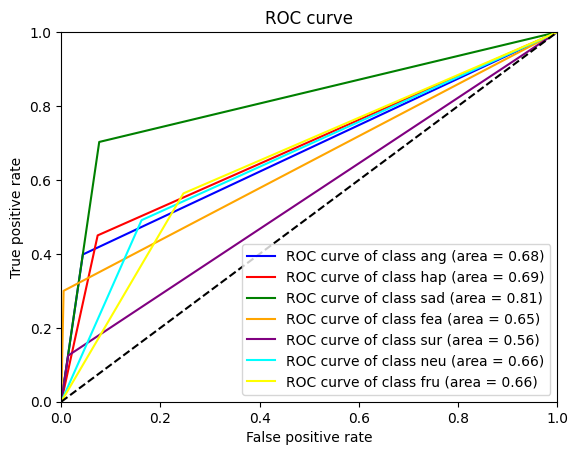

In [20]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Define class names
class_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu', 'fru']

# Convert y_predict_lr3 to a one-hot encoded format
n_classes = len(class_names)
y_pred_one_hot = np.zeros((y_predict_lr3_3.size, n_classes))
y_pred_one_hot[np.arange(y_predict_lr3_3.size), y_predict_lr3_3.astype(int)] = 1

# Initialize lists to store false positive rates, true positive rates, and AUCs
fprs = []
tprs = []
aucs = []

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    # Compute the ROC curve and AUC for the i-th class
    fpr, tpr, _ = metrics.roc_curve(attributes_dictionary['y_test'] == i, y_pred_one_hot[:, i])
    auc = metrics.auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)
    print(f"AUC for class {class_names[i]}: {auc}")

# Plotting the ROC curves
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan','yellow']
plt.figure()

for i in range(n_classes):
    plt.plot(fprs[i], tprs[i], color=colors[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], aucs[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

multinaivebayes_classifier = MultinomialNB()

multinaivebayes_classifier.fit(attributes_dictionary['x_train'], attributes_dictionary['y_train'])

y_predict_lr4 = multinaivebayes_classifier.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr4))

#Create classification report
class_report2=classification_report(attributes_dictionary['y_test'], y_predict_lr4)
print(class_report2)

Accuracy Score: 0.49667994687915007
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       241
           1       0.68      0.61      0.64       320
           2       0.68      0.26      0.38       212
           3       0.21      0.30      0.25        10
           4       0.12      0.69      0.20        16
           5       0.45      0.45      0.45       338
           6       0.42      0.64      0.51       369

    accuracy                           0.50      1506
   macro avg       0.47      0.48      0.42      1506
weighted avg       0.56      0.50      0.50      1506



In [22]:
C = np.array(confusion_matrix(attributes_dictionary['y_test'], y_predict_lr4))

confmtrx = pd.DataFrame(C, index=['angry, true','happy, true','sad, true','fear, true','sur, true','neutral, true','frustrated, true'],
                        columns=['angry, predicted','happy, predicted','sad, predicted','fear, predicted','sur, predicted','neutral, predicted','frustrated, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"angry, predicted","happy, predicted","sad, predicted","fear, predicted","sur, predicted","neutral, predicted","frustrated, predicted",sum
"angry, true",93,17,0,1,9,30,91,241
"happy, true",5,196,6,4,24,50,35,320
"sad, true",2,25,56,2,15,33,79,212
"fear, true",0,0,0,3,1,2,4,10
"sur, true",0,1,0,0,11,3,1,16
"neutral, true",2,35,11,4,19,153,114,338
"frustrated, true",23,16,9,0,13,72,236,369
sum,125,290,82,14,92,343,560,1506


In [23]:
logisticreg_classifer = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
logisticreg_classifer.fit(attributes_dictionary['x_train'], attributes_dictionary['y_train'])

y_predict_lr5 = logisticreg_classifer.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr5))

#Create classification report
class_report3=classification_report(attributes_dictionary['y_test'], y_predict_lr5)
print(class_report3)

Accuracy Score: 0.5351925630810093
              precision    recall  f1-score   support

           0       0.72      0.49      0.59       241
           1       0.70      0.62      0.65       320
           2       0.64      0.56      0.59       212
           3       0.19      0.30      0.23        10
           4       0.09      0.62      0.16        16
           5       0.46      0.46      0.46       338
           6       0.50      0.55      0.52       369

    accuracy                           0.54      1506
   macro avg       0.47      0.51      0.46      1506
weighted avg       0.58      0.54      0.55      1506



In [25]:
import xgboost

emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5,
                'fru': 6}

model_xgb = xgboost.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob',
                                   n_estimators=600, num_class=len(emotion_dict),
                                   booster='gbtree', n_jobs=4)
model_xgb.fit(attributes_dictionary['x_train'],  attributes_dictionary['y_train'])

y_predict_lr6 = model_xgb.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr6))

class_report4=classification_report(attributes_dictionary['y_test'], y_predict_lr6)
print(class_report4)

Accuracy Score: 0.5033200531208499
              precision    recall  f1-score   support

           0       0.57      0.43      0.49       241
           1       0.71      0.43      0.54       320
           2       0.59      0.69      0.63       212
           3       0.25      0.30      0.27        10
           4       0.08      0.25      0.12        16
           5       0.45      0.49      0.47       338
           6       0.43      0.53      0.48       369

    accuracy                           0.50      1506
   macro avg       0.44      0.45      0.43      1506
weighted avg       0.54      0.50      0.51      1506



In [26]:
# Predict
pred_probs1 = random_forest.predict_proba(attributes_dictionary['x_test'])
pred_probs2 = multinaivebayes_classifier.predict_proba(attributes_dictionary['x_test'])
pred_probs3 = logisticreg_classifer.predict_proba(attributes_dictionary['x_test'])
pred_probs4 = model_xgb.predict_proba(attributes_dictionary['x_test'])
print(pred_probs1)

[[3.75572732e-01 2.28243238e-01 2.73179602e-03 ... 8.37133497e-02
  1.26018190e-01 1.79724301e-01]
 [3.38305859e-01 1.89781642e-01 2.67578826e-04 ... 4.63880674e-02
  1.30787305e-01 2.94469547e-01]
 [1.11283682e-01 1.25337116e-01 1.39611627e-02 ... 4.01594546e-03
  2.08977448e-01 5.33635080e-01]
 ...
 [6.40389900e-02 5.45263263e-01 4.79014119e-02 ... 4.17609667e-02
  1.19186271e-01 1.80574588e-01]
 [5.14072839e-01 1.24729623e-01 7.05435971e-02 ... 1.10889351e-02
  9.49106835e-02 1.80357701e-01]
 [7.68974224e-02 1.14122190e-01 9.61115220e-02 ... 2.30029193e-02
  3.93889991e-01 2.70701964e-01]]


In [27]:
# Average of the predicted probabilites
averaging = (pred_probs1 +
                       pred_probs2 +
                       pred_probs3 +
                       pred_probs4)/4.0

print(averaging)
pred_new = np.argmax(averaging, axis=-1)
print(pred_new)

[[0.23178057 0.37207076 0.00847509 ... 0.10013775 0.12959386 0.14677867]
 [0.27593484 0.12403815 0.00789592 ... 0.02957409 0.24690256 0.3079005 ]
 [0.0795557  0.09858127 0.03771982 ... 0.01812048 0.22383649 0.53062023]
 ...
 [0.03211263 0.68861597 0.07256419 ... 0.06535742 0.06809163 0.06829908]
 [0.36751695 0.10552936 0.045402   ... 0.0366733  0.1496995  0.28422325]
 [0.11489004 0.10731473 0.0843404  ... 0.10028578 0.3526291  0.18451806]]
[1 6 6 ... 1 0 5]


In [28]:
print(attributes_dictionary['y_test'])

[6 0 6 ... 1 6 5]


In [29]:
class_report5=classification_report(attributes_dictionary['y_test'], pred_new)
print(class_report5)

              precision    recall  f1-score   support

           0       0.76      0.46      0.58       241
           1       0.73      0.62      0.67       320
           2       0.70      0.71      0.70       212
           3       0.25      0.30      0.27        10
           4       0.20      0.56      0.30        16
           5       0.49      0.53      0.51       338
           6       0.50      0.61      0.55       369

    accuracy                           0.58      1506
   macro avg       0.52      0.54      0.51      1506
weighted avg       0.61      0.58      0.59      1506



In [30]:
y_predict_lr3_3

array([0, 0, 6, ..., 1, 0, 5])

In [31]:
print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], np.array(pred_new)))

Accuracy Score: 0.5823373173970784


In [32]:
C = np.array(confusion_matrix(attributes_dictionary['y_test'], pred_new))

confmtrx = pd.DataFrame(C, index=['angry, true','happy, true','sad, true','fear, true','sur, true','neutral, true','frustrated, true'],
                        columns=['angry, predicted','happy, predicted','sad, predicted','fear, predicted','sur, predicted','neutral, predicted','frustrated, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"angry, predicted","happy, predicted","sad, predicted","fear, predicted","sur, predicted","neutral, predicted","frustrated, predicted",sum
"angry, true",112,16,4,0,6,19,84,241
"happy, true",7,199,12,3,10,60,29,320
"sad, true",0,4,150,1,5,26,26,212
"fear, true",0,0,1,3,0,3,3,10
"sur, true",1,2,1,0,9,2,1,16
"neutral, true",4,29,30,5,13,178,79,338
"frustrated, true",24,24,16,0,2,77,226,369
sum,148,274,214,12,45,365,448,1506
